In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [4]:
df=pd.read_csv("D:\\DATASETS\\catfish.csv")
df.head()

,Date,Total
0,1986-1-01,9034
1,1986-2-01,9596
2,1986-3-01,10558
3,1986-4-01,9002
4,1986-5-01,9239


In [6]:
df.set_index('Date',inplace=True)
df.index=pd.to_datetime(df.index)
df.dropna(inplace=True)

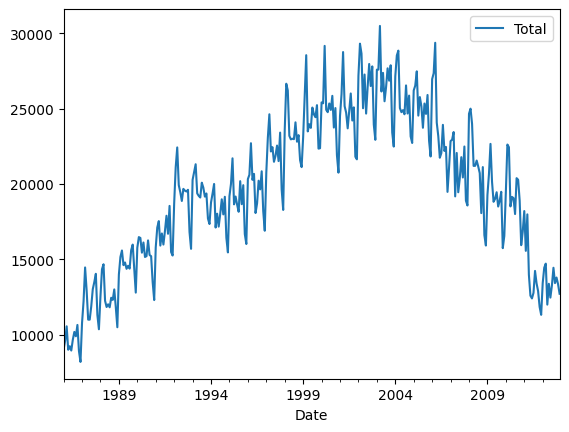

In [7]:
df.plot()
plt.show()

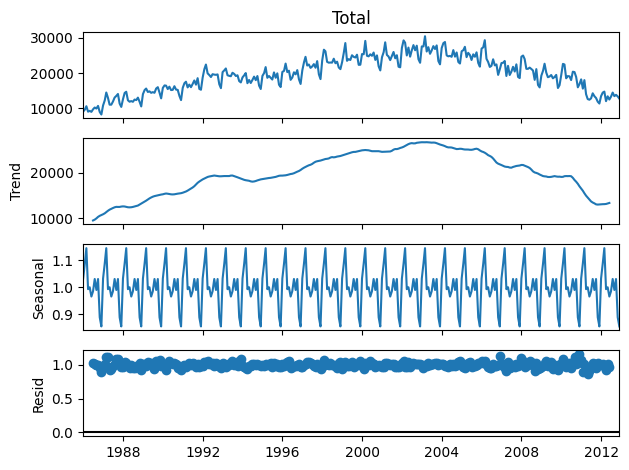

In [9]:
sd=seasonal_decompose(df['Total'],model='multiplicative',period=12)
sd.plot()
plt.show()

In [11]:
ADF=adfuller(df)
ADF

(-1.5899031233340126,
 0.4886635157188413,
 14,
 309,
 {'1%': -3.45169128009473,
  '5%': -2.8709394227049154,
  '10%': -2.5717780602423517},
 5177.796101004957)

In [12]:
df

,Total
Date,
1986-01-01,9034
1986-02-01,9596
1986-03-01,10558
1986-04-01,9002
1986-05-01,9239
...,...
2012-08-01,14442
2012-09-01,13422
2012-10-01,13795


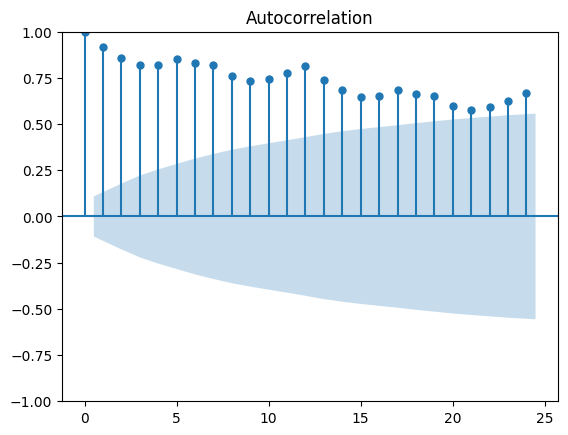

In [15]:
plot_acf(df,lags=24)
plt.show()

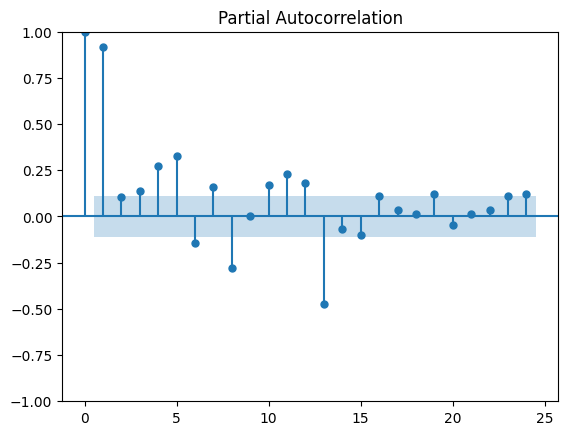

In [16]:
plot_pacf(df,lags=24)
plt.show()

In [18]:
from itertools import product

arima_results = {}

p_values=range(0,3)
d_values=range(0,3)
q_values=range(0,3)

for p,d,q in product(p_values,d_values,q_values):
    try:
        arima_model=ARIMA(df,order=(p,d,q))
        arima_model_fit=arima_model.fit()
        aic_score = arima_model_fit.aic
        bic_score = arima_model_fit.bic
        arima_results[(p, d, q)] = {'AIC': aic_score, 'BIC': bic_score}
    except Exception as e:
        print(f"Error for ARIMA({p},{d},{q}): {e}")

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-package

In [19]:
for params, scores in arima_results.items():
    print(f"ARIMA{params} - AIC: {scores['AIC']}, BIC: {scores['BIC']}")

ARIMA(0, 0, 0) - AIC: 6446.688424801021, BIC: 6454.249911832606
ARIMA(0, 0, 1) - AIC: 6151.966481658802, BIC: 6163.308712206179
ARIMA(0, 0, 2) - AIC: 6015.313446208675, BIC: 6030.436420271844
ARIMA(0, 1, 0) - AIC: 5811.701923861854, BIC: 5815.479576185076
ARIMA(0, 1, 1) - AIC: 5796.278829630993, BIC: 5803.834134277438
ARIMA(0, 1, 2) - AIC: 5755.2598924789345, BIC: 5766.5928494486025
ARIMA(0, 2, 0) - AIC: 6063.502641885396, BIC: 6067.27719343094
ARIMA(0, 2, 1) - AIC: 5807.419522281833, BIC: 5814.968625372922
ARIMA(0, 2, 2) - AIC: 5798.296578204025, BIC: 5809.620232840658
ARIMA(1, 0, 0) - AIC: 5825.279649262326, BIC: 5836.6218798097025
ARIMA(1, 0, 1) - AIC: 5814.498101647376, BIC: 5829.6210757105455
ARIMA(1, 0, 2) - AIC: 5773.934673390667, BIC: 5792.838390969629
ARIMA(1, 1, 0) - AIC: 5806.730638431987, BIC: 5814.285943078433
ARIMA(1, 1, 1) - AIC: 5757.475214570794, BIC: 5768.808171540462
ARIMA(1, 1, 2) - AIC: 5754.738504650759, BIC: 5769.849113943649
ARIMA(1, 2, 0) - AIC: 5973.8996780459

In [21]:
lowest_aic_params = min(arima_results.items(), key=lambda x: x[1]['AIC'])
lowest_aic_params

((2, 1, 2), {'AIC': 5740.517774757378, 'BIC': 5759.406036373492})

In [25]:
train=df[0:260]
test=df[260:]

In [205]:
model=ARIMA(train,order=(17,1,17))
model_fit=model.fit()

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\hp\AppData\Loc

In [206]:
print(model_fit.aic,model_fit.bic)

4330.3839167975 4454.872898956984


In [207]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                  260
Model:               ARIMA(17, 1, 17)   Log Likelihood               -2130.192
Date:                Sat, 11 Jan 2025   AIC                           4330.384
Time:                        17:20:32   BIC                           4454.873
Sample:                    01-01-1986   HQIC                          4380.436
                         - 08-01-2007                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3511      0.312     -1.126      0.260      -0.962       0.260
ar.L2          0.1838      0.286      0.643      0.520      -0.376       0.744
ar.L3         -0.4104      0.178     -2.312      0.0

In [208]:
test.tail()

,Total
Date,
2012-08-01,14442
2012-09-01,13422
2012-10-01,13795
2012-11-01,13352
2012-12-01,12716


In [209]:
start_date_index="2007-09-01"
end_date_index="2012-12-01"

In [210]:
test_pred=model_fit.predict(start=start_date_index,end=end_date_index)
test_pred

2007-09-01    20479.001941
2007-10-01    21811.025265
2007-11-01    17839.653996
2007-12-01    19404.796257
2008-01-01    20904.503813
                  ...     
2012-08-01    16685.169889
2012-09-01    17104.797713
2012-10-01    15864.609835
2012-11-01    14373.118210
2012-12-01    15194.278570
Freq: MS, Name: predicted_mean, Length: 64, dtype: float64

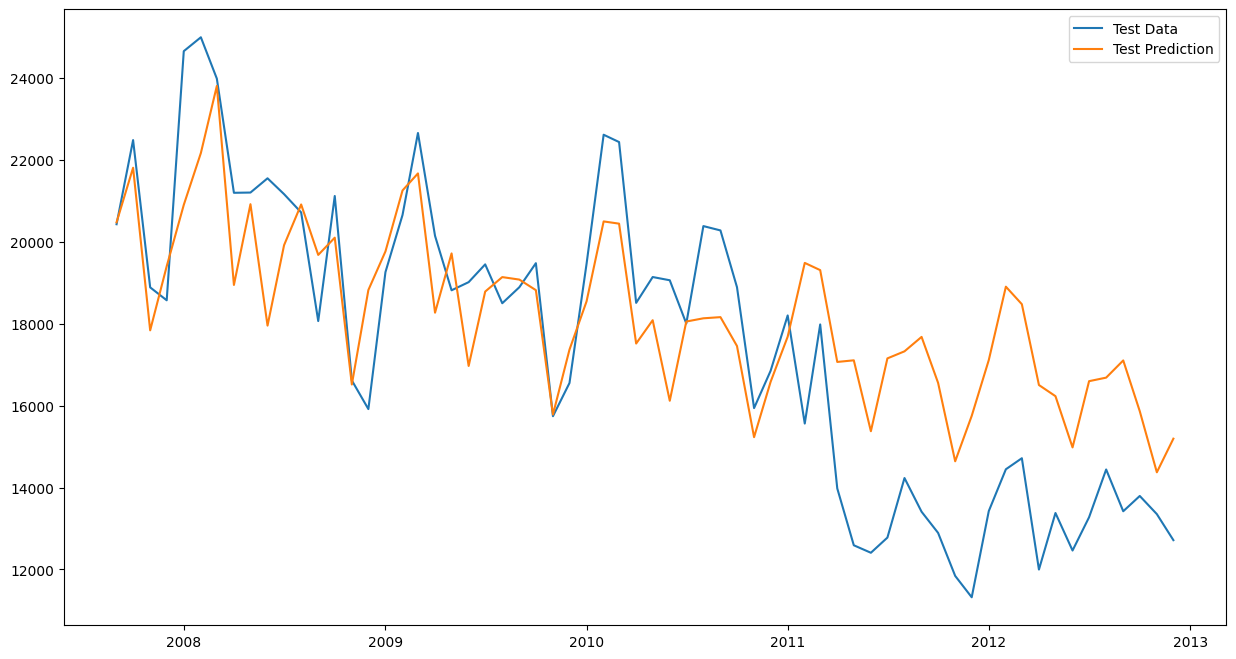

In [211]:
plt.figure(figsize=(15,8))
plt.plot(test)
plt.plot(test_pred)
plt.legend(("Test Data","Test Prediction"))
plt.show()

In [212]:
future_start_date_index="2013-01-01"
future_end_date_index="2013-12-01"

In [213]:
forecast=model_fit.predict(start=future_start_date_index,end=future_end_date_index)
forecast

2013-01-01    16591.159428
2013-02-01    18307.151626
2013-03-01    17922.159026
2013-04-01    16193.872727
2013-05-01    15571.155657
2013-06-01    14572.007668
2013-07-01    16103.052908
2013-08-01    16325.812871
2013-09-01    16735.868671
2013-10-01    15305.767701
2013-11-01    14072.777317
2013-12-01    14782.224834
Freq: MS, Name: predicted_mean, dtype: float64

In [214]:
future_index=pd.date_range(start=future_start_date_index,end=future_end_date_index,freq='MS')
future_index

DatetimeIndex(['2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [215]:
forecast_pd=pd.DataFrame(forecast,index=future_index)
forecast_pd

,predicted_mean
2013-01-01,16591.159428
2013-02-01,18307.151626
2013-03-01,17922.159026
2013-04-01,16193.872727
2013-05-01,15571.155657
2013-06-01,14572.007668
2013-07-01,16103.052908
2013-08-01,16325.812871
2013-09-01,16735.868671
2013-10-01,15305.767701


In [216]:
test

,Total
Date,
2007-09-01,20431
2007-10-01,22486
2007-11-01,18889
2007-12-01,18574
2008-01-01,24658
...,...
2012-08-01,14442
2012-09-01,13422
2012-10-01,13795


In [217]:
forecast

2013-01-01    16591.159428
2013-02-01    18307.151626
2013-03-01    17922.159026
2013-04-01    16193.872727
2013-05-01    15571.155657
2013-06-01    14572.007668
2013-07-01    16103.052908
2013-08-01    16325.812871
2013-09-01    16735.868671
2013-10-01    15305.767701
2013-11-01    14072.777317
2013-12-01    14782.224834
Freq: MS, Name: predicted_mean, dtype: float64

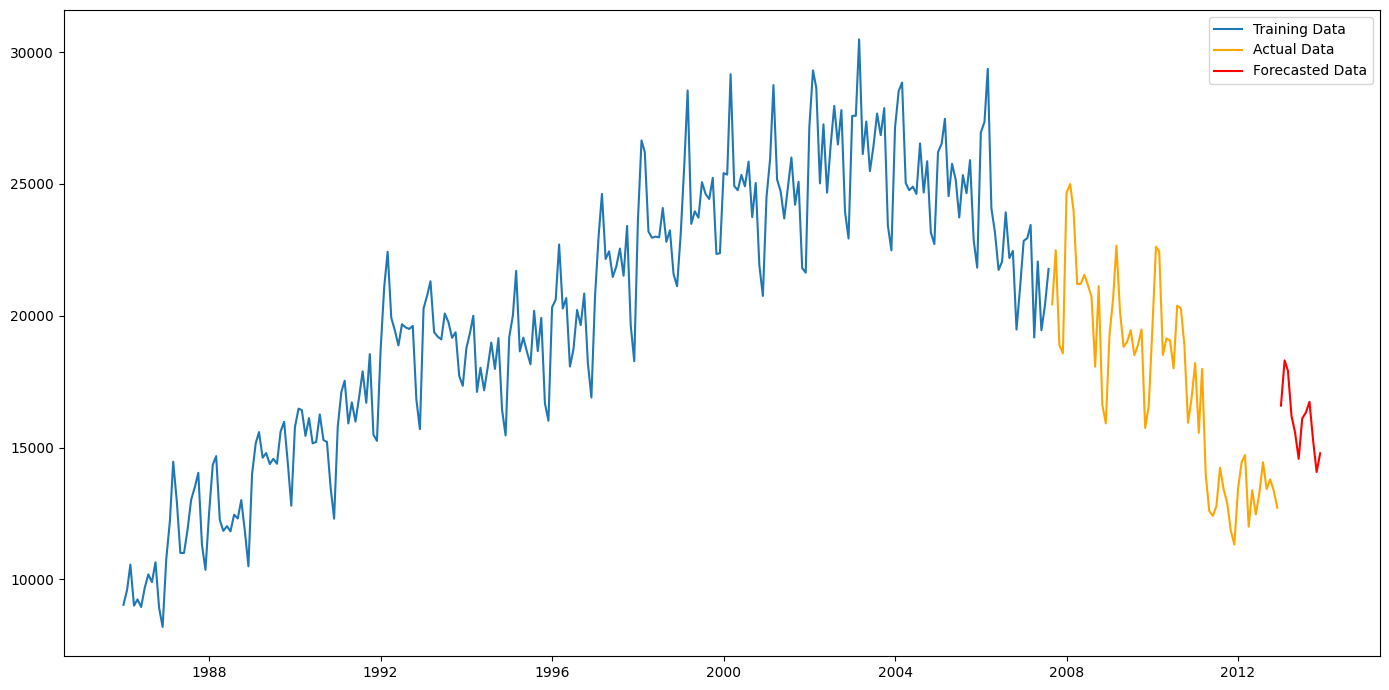

In [218]:
plt.figure(figsize=(14,7))
plt.plot(train.index,train['Total'],label='Training Data')
plt.plot(test.index,test['Total'], label='Actual Data', color='orange')
plt.plot(forecast_pd.index ,forecast_pd['predicted_mean'],label='Forecasted Data', color='red')

plt.legend()
plt.tight_layout()
plt.show()

Automated ARIMA

In [219]:
df_diff=df['Total'].diff()

In [220]:
df_diff.dropna(inplace=True)

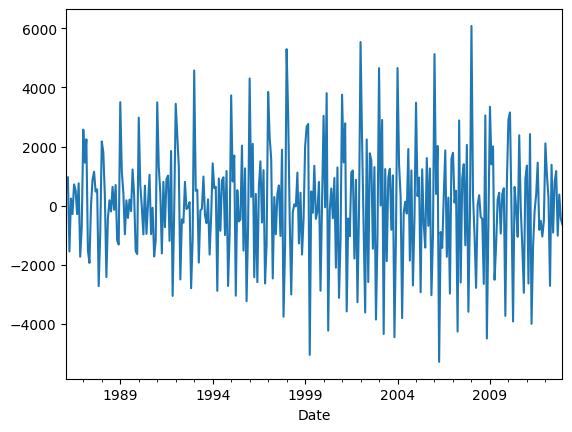

In [221]:
df_diff.plot()
plt.show()

In [224]:
from pmdarima import auto_arima

In [226]:
len(df_diff)*0.8

258.40000000000003

In [227]:
train_n=df_diff[:258]
test_n=df_diff[258:]

In [228]:
new_model=auto_arima(train_n,start_p=0, start_q=0,d=0,
                           max_p=40, max_q=40,information_criterion='aic',trace=True,suppress_warnings=True,stepwise=True,seasonal=False)
new_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4640.259, Time=0.93 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=4636.014, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4620.778, Time=0.41 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=4589.759, Time=0.39 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=4581.145, Time=0.56 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=4631.805, Time=0.30 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=4560.965, Time=0.42 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=4592.058, Time=0.20 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=4527.872, Time=0.88 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=4541.545, Time=0.69 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=4529.510, Time=1.83 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=4.63 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=2.66 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=4541.663, Time=0.57 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=4

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  258
Model:              SARIMAX(13, 0, 1)   Log Likelihood               -2146.058
Date:                Sat, 11 Jan 2025   AIC                           4322.116
Time:                        17:33:56   BIC                           4375.410
Sample:                    02-01-1986   HQIC                          4343.546
                         - 07-01-2007                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1604      0.221      0.727      0.467      -0.272       0.593
ar.L2         -0.0845      0.069     -1.231      0.218      -0.219       0.050
ar.L3         -0.1005      0.072     -1.397      0.162      -0.241       0.040
ar.L4         -0.0153      0.071     -0.217      0.828      -0.153       0.123
ar.L5          0.0516      0.063      0.820      0.412      -0.072       0.175
ar.L6         -0.1217      0.058     -2.110      0.035      -0.235      -0.009
ar.L7          0.0925      0.068      1.361      0.173      -0.041       0.226
ar.L8         -0.0871      0.057     -1.531      0.126      -0.199       0.024
ar.L9         -0.0585      0.058     -1.004      0.316      -0.173       0.056
ar.L10         0.0060      0.056      0.107      0.915      -0.104       0.117
ar.L11         0.0026      0.058      0.045      0.964      -0.111       0.116
ar.L12         0.6826      0.052     13.192      0.000       0.581       0.784
ar.L13        -0.0800      0.154     -0.519      0.604      -0.382       0.222
ma.L1         -0.5543      0.206     -2.697      0.007      -0.957      -0.151
sigma2      9.826e+05   9.67e+04     10.162      0.000    7.93e+05    1.17e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.81
Prob(Q):                              0.98   Prob(JB):                         0.40
Heteroskedasticity (H):               1.66   Skew:                             0.20
Prob(H) (two-sided):                  0.02   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [229]:
model_2=ARIMA(train_n,order=(13,0,1))
model_2_fit=model_2.fit()

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\hp\AppData\Loc

In [233]:
model_2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Total   No. Observations:                  258
Model:                ARIMA(13, 0, 1)   Log Likelihood               -2145.565
Date:                Sat, 11 Jan 2025   AIC                           4323.130
Time:                        17:41:01   BIC                           4379.978
Sample:                    02-01-1986   HQIC                          4345.989
                         - 07-01-2007                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.9691     46.384      0.948      0.343     -46.942     134.880
ar.L1          0.1399      0.242      0.578      0.563      -0.334       0.614
ar.L2         -0.0950      0.077     -1.234      0.217      -0.246       0.056
ar.L3         -0.1103      0.080     -1.385      0.166      -0.266       0.046
ar.L4         -0.0265      0.078     -0.342      0.732      -0.178       0.125
ar.L5          0.0415      0.069      0.606      0.545      -0.093       0.176
ar.L6         -0.1301      0.059     -2.207      0.027      -0.246      -0.015
ar.L7          0.0832      0.070      1.195      0.232      -0.053       0.220
ar.L8         -0.0944      0.057     -1.663      0.096      -0.206       0.017
ar.L9         -0.0673      0.061     -1.101      0.271      -0.187       0.052
ar.L10        -0.0037      0.059     -0.062      0.951      -0.120       0.113
ar.L11        -0.0068      0.062     -0.109      0.913      -0.129       0.115
ar.L12         0.6752      0.058     11.666      0.000       0.562       0.789
ar.L13        -0.0736      0.162     -0.453      0.650      -0.392       0.245
ma.L1         -0.5375      0.230     -2.336      0.019      -0.988      -0.087
sigma2      9.782e+05   9.79e+04      9.987      0.000    7.86e+05    1.17e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.67
Prob(Q):                              0.95   Prob(JB):                         0.43
Heteroskedasticity (H):               1.72   Skew:                             0.19
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [230]:
new_test_pred=model_2_fit.predict(start=start_date_index,end=end_date_index)
new_test_pred

2007-09-01   -1441.264172
2007-10-01     560.002494
2007-11-01   -2892.288707
2007-12-01    1950.497478
2008-01-01    1381.660283
                 ...     
2012-08-01     575.465213
2012-09-01    -999.555282
2012-10-01     455.998961
2012-11-01   -1531.283965
2012-12-01    1438.767305
Freq: MS, Name: predicted_mean, Length: 64, dtype: float64

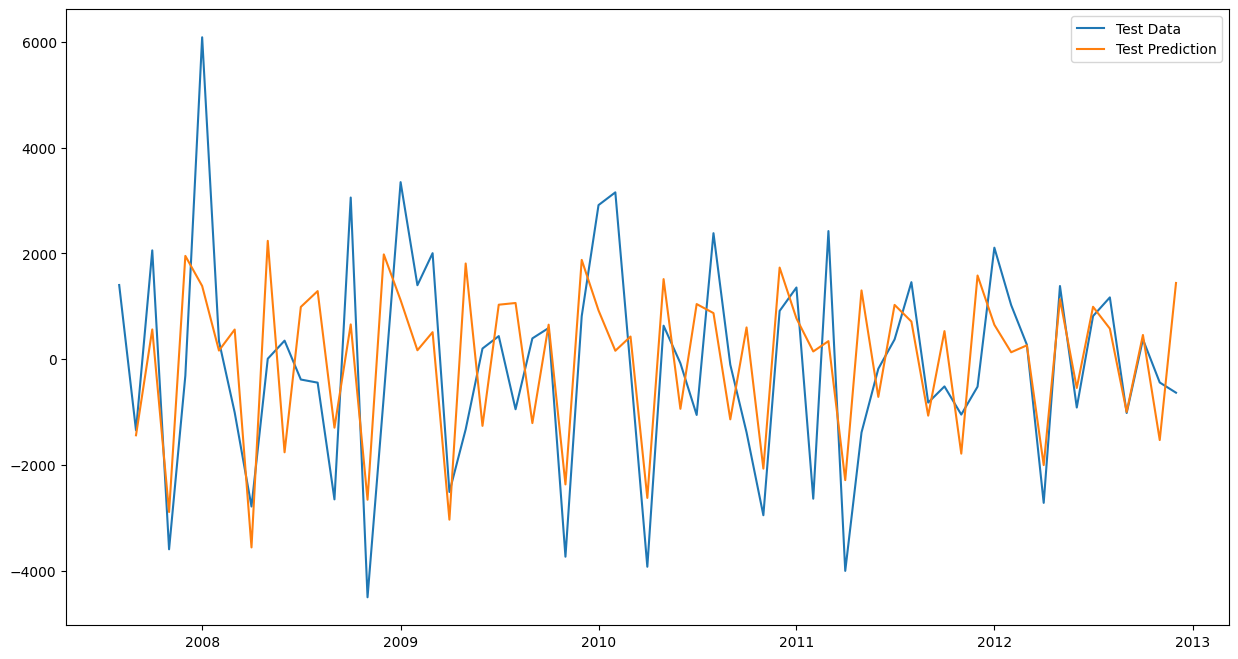

In [232]:
plt.figure(figsize=(15,8))
plt.plot(test_n)
plt.plot(new_test_pred)
plt.legend(("Test Data","Test Prediction"))
plt.show()

In [235]:
new_forecast=model_2_fit.predict(start=future_start_date_index,end=future_end_date_index)
new_forecast

2013-01-01     549.259364
2013-02-01     112.172131
2013-03-01     190.424640
2013-04-01   -1758.616369
2013-05-01    1004.465206
2013-06-01    -416.169536
2013-07-01     938.988206
2013-08-01     463.117859
2013-09-01    -927.629897
2013-10-01     388.515914
2013-11-01   -1303.261598
2013-12-01    1310.209562
Freq: MS, Name: predicted_mean, dtype: float64

In [236]:
def invert_diff(last_actual,differences):
    inverted_values=[]
    last_observation=last_actual
    for diff in differences:
        inverted_value=last_observation+diff
        inverted_values.append(inverted_value)
        last_observation=inverted_value
    return inverted_values

In [238]:
forcast_og=invert_diff(df['Total'].iloc[-1],new_forecast)
forcast_og

[13265.259364214615,
 13377.431495035422,
 13567.856135216409,
 11809.239766507235,
 12813.704972366328,
 12397.535436592572,
 13336.523643018463,
 13799.641502002807,
 12872.011604944502,
 13260.527519145175,
 11957.26592160538,
 13267.475483373164]

In [239]:
forecast_pd=pd.DataFrame(forcast_og,index=future_index)
forecast_pd

,0
2013-01-01,13265.259364
2013-02-01,13377.431495
2013-03-01,13567.856135
2013-04-01,11809.239767
2013-05-01,12813.704972
2013-06-01,12397.535437
2013-07-01,13336.523643
2013-08-01,13799.641502
2013-09-01,12872.011605
2013-10-01,13260.527519


In [242]:
columns=['Total']
forecast_pd.columns=columns

In [243]:
forecast_pd

,Total
2013-01-01,13265.259364
2013-02-01,13377.431495
2013-03-01,13567.856135
2013-04-01,11809.239767
2013-05-01,12813.704972
2013-06-01,12397.535437
2013-07-01,13336.523643
2013-08-01,13799.641502
2013-09-01,12872.011605
2013-10-01,13260.527519


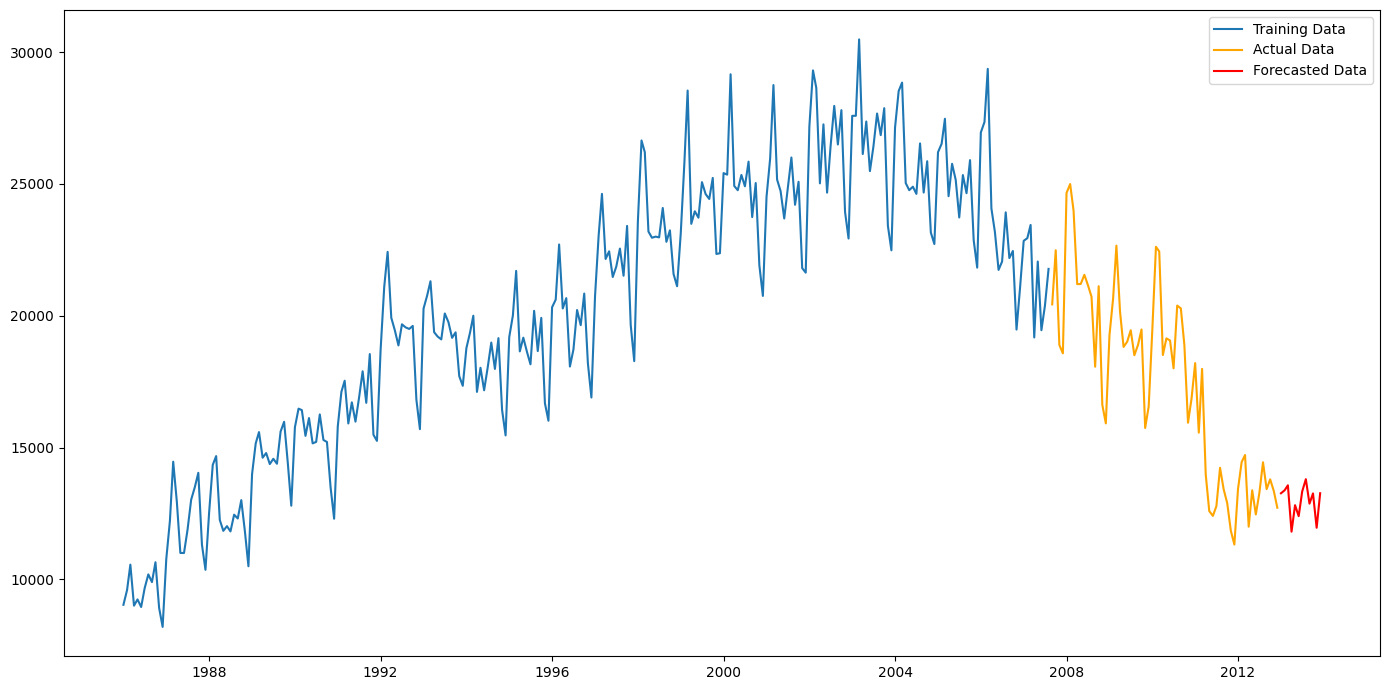

In [244]:
# future_index=pd.date_range(start=future_start_date_index,end=future_end_date_index,freq='MS')
# future_index


plt.figure(figsize=(14,7))
plt.plot(train.index,train['Total'],label='Training Data')
plt.plot(test.index,test['Total'], label='Actual Data', color='orange')
plt.plot(forecast_pd.index ,forecast_pd['Total'],label='Forecasted Data', color='red')

plt.legend()
plt.tight_layout()
plt.show()